In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
est=pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')

In [3]:
est.head()

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,150500,325000.0,0.4630,Commercial,Nan,1
1,20002,2020,10/02/2020,Ashford,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,03/09/2021,Avon,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,07/02/2021,Avon,862330,1447500.0,0.5957,Residential,Single Family,1


In [4]:
est.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01,0.750900
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03,0.434742
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01,1.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000


In [5]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Assessed Value    997213 non-null  int64  
 5   Sale Amount       997213 non-null  float64
 6   Sales Ratio       997213 non-null  float64
 7   Property Type     997213 non-null  object 
 8   Residential Type  997213 non-null  object 
 9   Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 76.1+ MB


REPLACING NaN VALUES TREATED AS A STRING INSTEAD OF BEING TREATED AS A MISSING VALUE IN BOTH PROPERTY TYPE AND RESIDENTIAL TYPE COLUMNS

In [6]:
est['Property Type'].unique()

array(['Commercial', 'Residential', 'Vacant Land', 'Nan', 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

In [7]:
est[est['Property Type'] == 'Commercial'].shape[0]

1981

In [8]:
est['Property Type'].value_counts()

Property Type
Single Family     401612
Nan               382446
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64

In [9]:
est['Property Type']=est['Property Type'].replace('Nan','Other')

In [10]:
est['Property Type'].value_counts()

Property Type
Single Family     401612
Other             382446
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64

In [11]:
est['Residential Type'].unique()

array(['Nan', 'Single Family', 'Condo', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [12]:
est['Residential Type'].value_counts()

Residential Type
Single Family    445016
Nan              388309
Condo            117780
Two Family        29609
Three Family      14081
Four Family        2418
Name: count, dtype: int64

In [13]:
est['Residential Type']=est['Residential Type'].replace('Nan','Other')

In [14]:
est['Residential Type'].value_counts()

Residential Type
Single Family    445016
Other            388309
Condo            117780
Two Family        29609
Three Family      14081
Four Family        2418
Name: count, dtype: int64

WORKING ON THE DATETIME FORMATS

In [15]:
est['Date Recorded']

0          9/13/2021
1         10/02/2020
2         03/09/2021
3          4/13/2021
4         07/02/2021
             ...    
997208     6/24/2020
997209    11/27/2019
997210     4/27/2020
997211    06/03/2020
997212    12/20/2019
Name: Date Recorded, Length: 997213, dtype: object

In [16]:
est['Date Recorded']=pd.to_datetime(est['Date Recorded'])

In [17]:
est['List Year']=pd.to_datetime(est['List Year'],format='%Y').dt.year

In [18]:
est.dtypes

Serial Number                int64
List Year                    int32
Date Recorded       datetime64[ns]
Town                        object
Assessed Value               int64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Years until sold             int64
dtype: object

In [19]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997213 non-null  int64         
 1   List Year         997213 non-null  int32         
 2   Date Recorded     997213 non-null  datetime64[ns]
 3   Town              997213 non-null  object        
 4   Assessed Value    997213 non-null  int64         
 5   Sale Amount       997213 non-null  float64       
 6   Sales Ratio       997213 non-null  float64       
 7   Property Type     997213 non-null  object        
 8   Residential Type  997213 non-null  object        
 9   Years until sold  997213 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(3)
memory usage: 72.3+ MB


In [20]:
est['Sales Ratio']

0         0.463000
1         0.588300
2         0.724800
3         0.695800
4         0.595700
            ...   
997208    1.137665
997209    0.898400
997210    0.578300
997211    0.726300
997212    0.541700
Name: Sales Ratio, Length: 997213, dtype: float64

In [21]:
est['Calculated Sales Ratio']=est['Sale Amount']/est['Assessed Value']

In [22]:
est.head()

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Calculated Sales Ratio
0,2020348,2020,2021-09-13,Ansonia,150500,325000.0,0.4630,Commercial,Other,1,2.159468
1,20002,2020,2020-10-02,Ashford,253000,430000.0,0.5883,Residential,Single Family,0,1.699605
2,200212,2020,2021-03-09,Avon,130400,179900.0,0.7248,Residential,Condo,1,1.379601
3,200243,2020,2021-04-13,Avon,619290,890000.0,0.6958,Residential,Single Family,1,1.437130
4,200377,2020,2021-07-02,Avon,862330,1447500.0,0.5957,Residential,Single Family,1,1.678592


In [23]:
del est['Calculated Sales Ratio']

In [24]:
est.head()

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,2021-09-13,Ansonia,150500,325000.0,0.4630,Commercial,Other,1
1,20002,2020,2020-10-02,Ashford,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,2021-03-09,Avon,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,2021-04-13,Avon,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,2021-07-02,Avon,862330,1447500.0,0.5957,Residential,Single Family,1


AVERAGE ASSESSED VALUE, SALES AMOUNT AND SALES RATIO BY YEAR

In [25]:
avg_by_year=est.groupby('List Year').agg({'Assessed Value':'mean',
                                          'Sale Amount':'mean',
                                          'Sales Ratio':'mean'}).reset_index()

In [26]:
print(avg_by_year)

    List Year  Assessed Value    Sale Amount  Sales Ratio
0        2001   138961.045482  246235.035160     3.506386
1        2002   177434.080594  296357.123706     4.087334
2        2003   188067.638755  327217.932922     5.340675
3        2004   214266.720175  380297.014169     9.222742
4        2005   198067.146424  364030.126084    76.009086
5        2006   338248.086912  475379.225385    52.069576
6        2007   334548.775079  435713.379734     2.113330
7        2008   292110.829388  325831.792393     1.603672
8        2009   338422.314482  355250.327162     2.269027
9        2010   307099.145621  331657.472575     2.435234
10       2011   412067.636279  391684.320747     2.738944
11       2012   356468.186279  395477.676013     2.143659
12       2013   336146.203891  413516.239641     2.415508
13       2014   307782.171116  401421.941220     1.673331
14       2015   300223.060792  345883.763949     3.943542
15       2016   323196.232958  507761.249272     1.786716
16       2017 

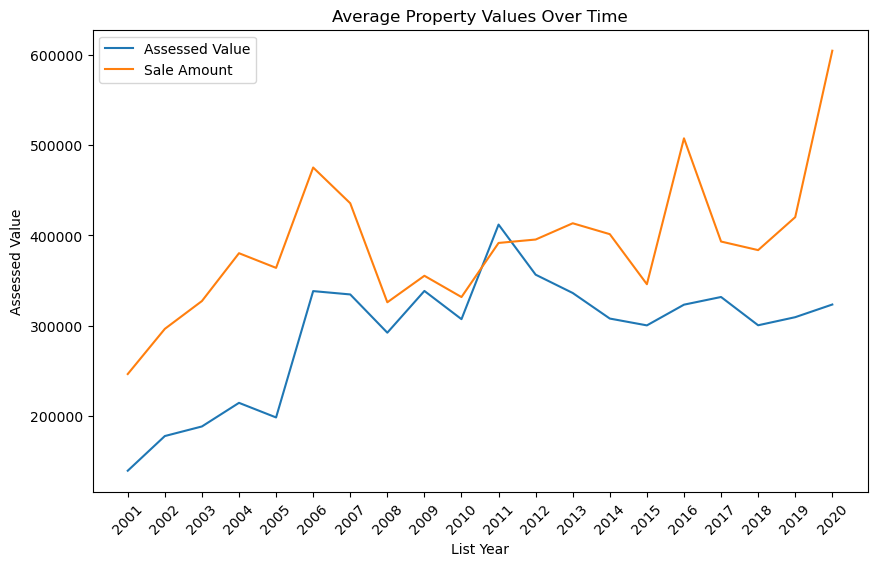

In [27]:
plt.figure(figsize=(10,6))
sb.lineplot(data=avg_by_year,x='List Year', y='Assessed Value',label='Assessed Value')
sb.lineplot(data=avg_by_year,x='List Year', y='Sale Amount', label='Sale Amount')
plt.xticks(ticks=avg_by_year['List Year'].unique(),rotation=45)
plt.legend()
plt.title('Average Property Values Over Time')
plt.show()

AVERAGE TIME UNTIL RESIDENTIAL AND PROPERTY TYPES GET SOLD

In [28]:
avg_time_by_property_type=est.groupby('Property Type')['Years until sold'].mean().reset_index()
avg_time_by_residential_type=est.groupby('Residential Type')['Years until sold'].mean().reset_index()
print(avg_time_by_property_type)
print(avg_time_by_residential_type)

     Property Type  Years until sold
0       Apartments          0.818930
1       Commercial          0.772337
2            Condo          0.742079
3      Four Family          0.729302
4       Industrial          0.763158
5            Other          0.756970
6   Public Utility          0.800000
7      Residential          0.723785
8    Single Family          0.753140
9     Three Family          0.734785
10      Two Family          0.732770
11     Vacant Land          0.752450
  Residential Type  Years until sold
0            Condo          0.742639
1      Four Family          0.734491
2            Other          0.757093
3    Single Family          0.749274
4     Three Family          0.736666
5       Two Family          0.735081


TOWNS WITH THE MOST PROPERTY SALES IN 2021

In [29]:
sales_2021=est[est['Date Recorded'].dt.year==2021]
town_sales_2021=sales_2021['Town'].value_counts().head(10)
print(town_sales_2021)

Town
Stamford         1981
Waterbury        1753
Norwalk          1427
Greenwich        1333
Danbury          1170
New Haven        1065
West Hartford    1043
Bristol          1015
Hartford          980
Stratford         965
Name: count, dtype: int64


SOME EXPLORATORY DATA ANALYSIS

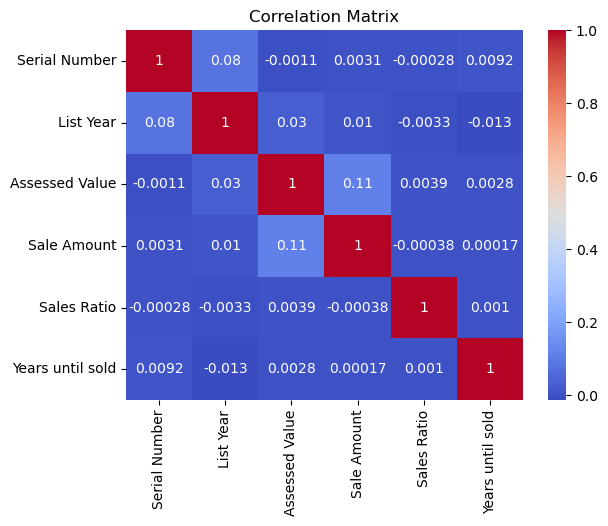

In [30]:
numeric_est = est.select_dtypes(include=['number'])
correlation_matrix=numeric_est.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [31]:
est.to_csv('cleaned_real_estate_sales.csv', index=False)